# Simulate aDDM Trial Data

This notebook will follow addm_toolbox's `get_empirical_distributions` function in `utils.py` to generate realistic fixation data. The original function takes in an aDDM trial object, but I will instead handle data as it is organized in `eum2023_data_code/data/joint/`. Broadly, the structure is:

Reading in data will be slightly different than passing in data trial by trial, so edge cases concerning trial type, number, and number of fixations will be handled while reading the data. Broadly, we will need trial type and item values from the "choices" files and fixation location and duration from fixations_{sub_id}.csv. The rest of the commentary will be commented in the cells.

Additionally several arguments are removed/changed from the function:
- numFixDists: we understand them to be four from Brendan's paper
- fixDistType: it will always be fixation in Brendan's paper
- valueDiffs: rdv's are 1-4 with 0.25 ticks
- useCisTrials: not relevant
- useTranstrials: not relevant

The function was completed in a separate file `get_empirical_distributions`. Here, we continue with its functionality.

In [59]:
import get_empirical_distributions

path = '/Users/braydenchien/Desktop/Enkavilab/DDM/1ms_trial_data.csv'
bin_size = 0.001

empirical_distributions = get_empirical_distributions.get_empirical_distributions(path, bin_size)

Now we write a function that takes in a seed and bin size and randomly generates a long list of 30 seconds worth of fixations. It also takes in the relative value difference (left - right) of the fixation items.

In [60]:
import numpy as np

def generate_fixations(bin_size, relative_value_difference, seed=42):
    np.random.seed(seed)

    probLeftFirst = empirical_distributions['probFixLeftFirst']
    if np.random.rand() > probLeftFirst:
        relative_value_difference *= -1

    events = []
    global_time = 0.0

    # Initial latency event
    latency = np.random.choice(empirical_distributions['latencies'])
    events.append((global_time, global_time + latency, 0))  # code 0 = latency
    global_time += latency

    # First fixation event
    first_fixation_duration = np.random.choice(empirical_distributions['fixations'][1][relative_value_difference])
    code = 1 if relative_value_difference > 0 else 2
    events.append((global_time, global_time + first_fixation_duration, code))
    global_time += first_fixation_duration
    relative_value_difference *= -1

    # Subsequent fixations
    while global_time < 30.0:
        # Sample next fixation duration
        next_duration = np.random.choice(empirical_distributions['fixations'][2][relative_value_difference])
        code = 1 if relative_value_difference > 0 else 2
        events.append((global_time, global_time + next_duration, code))
        global_time += next_duration

        transition_duration = np.random.choice(empirical_distributions['transitions'])
        events.append((global_time, global_time + transition_duration, 0))
        global_time += transition_duration
        relative_value_difference *= -1

    # Generate fixation sequence by binning
    num_bins = int(30 / bin_size)
    fixation_sequence = []

    for i in range(num_bins):
        bin_start_time = i * bin_size
        # Find which event the bin falls into
        for start, end, event_code in events:
            if start <= bin_start_time < end:
                fixation_sequence.append(event_code)
                break
        else:
            # Should not happen, but fallback
            fixation_sequence.append(0)

    return tuple(fixation_sequence)

In [61]:
mytuple = generate_fixations(0.001, 0.25)
mytuple

(0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
trial = {'avgWTP_left': 3,
         'avgWTP_right': 2.75,
         'fixation': mytuple}

In [13]:
def drift_function(avgWTP_left, avgWTP_right, fixation, t):
    d = 0.2
    theta = 0.38
    fixation_index = min(int(t/0.01), len(fixation)-1)
    current_fixation = fixation[fixation_index]
    if current_fixation == 0: # saccade
        return 0
    elif current_fixation == 1: # left
        return d * (avgWTP_left -  avgWTP_right * theta)
    else: # right
        return d * (avgWTP_left * theta -  avgWTP_right)

In [ ]:
import pyddm
from pyddm.models import OverlayChain

model = pyddm.gddm(
    drift=drift_function,
    noise=0.18,
    bound=1,
    nondecision=0,
    conditions=["avgWTP_left", "avgWTP_right", "fixation"],
    choice_names=("left", "right"),
    T_dur=5,
    dx=0.001,
    dt=0.001
)

model._overlay = OverlayChain(overlays=[]) # issues with simulating trajectory and overlay

In [20]:
res = model.simulate_trial(trial)

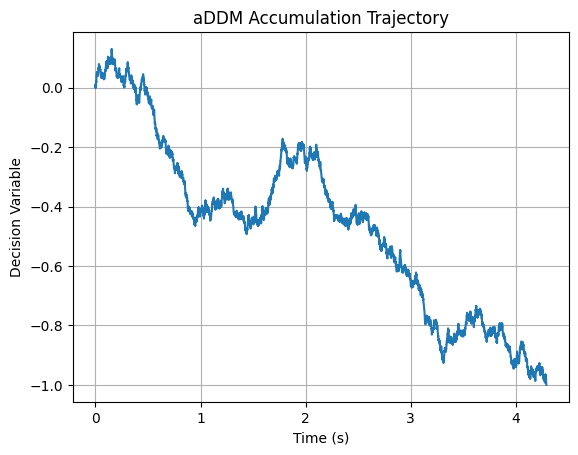

In [21]:
import matplotlib.pyplot as plt
import numpy as np

trajectory = res  # what simulate_trial(trial) returned
timesteps = np.arange(len(trajectory)) * model.dt  # convert indices to seconds

plt.plot(timesteps, trajectory)
plt.xlabel("Time (s)")
plt.ylabel("Decision Variable")
plt.title("aDDM Accumulation Trajectory")
plt.grid(True)
plt.show()

In [27]:
print(f'{trial['fixation'][:int(len(res)/(bin_size/model.dt))]}')

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 

In [42]:
actual_tuple = ast.literal_eval(mydf['fixation'][1])
len(actual_tuple)

2573